In [2]:
import sys
import os
from dotenv import load_dotenv
import pandas as pd

# プロジェクトルートのパスを追加（quantechiaがあるディレクトリ）
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
load_dotenv()

True

In [15]:
import pandas as pd
import numpy as np
from quantechia.strategies import basestrategy 
from quantechia import analysis
from quantechia.data.data_fetcher import FinancialDataFetcher

import importlib
importlib.reload(basestrategy)
importlib.reload(analysis)

<module 'quantechia.analysis' from '/app/quantechia/analysis.py'>

In [4]:
# 株価データを取得
fetcher = FinancialDataFetcher()
tickers = ['AAPL', 'MSFT', 'GOOG']
start_date = '2023-01-01'
end_date = '2023-03-31'
historical_data = fetcher.get_historical_data("data_reader", name=tickers, data_source='stooq')
price_data = historical_data['Close']



In [16]:
equal_weight_strategy = basestrategy.EqualWeightStrategy(price_data, strategy_name="Equal Weight")
trend_following_strategy = basestrategy.TrendFollowingStrategy(price_data, window=20, strategy_name="Trend Following")

In [17]:
equal_weight_strategy.calculate_weight()

Symbols,AAPL,MSFT,GOOG
Date,,,
2020-05-18,0.333333,0.333333,0.333333
2020-05-19,0.333333,0.333333,0.333333
2020-05-20,0.333333,0.333333,0.333333
2020-05-21,0.333333,0.333333,0.333333
2020-05-22,0.333333,0.333333,0.333333
...,...,...,...
2025-05-12,0.333333,0.333333,0.333333
2025-05-13,0.333333,0.333333,0.333333
2025-05-14,0.333333,0.333333,0.333333


In [18]:
equal_weight_strategy.calculate_returns()

,Equal Weight
Date,
2020-05-19,-0.006773
2020-05-20,0.019188
2020-05-21,-0.007430
2020-05-22,0.004109
2020-05-26,-0.004244
...,...
2025-05-12,0.039813
2025-05-13,0.006031
2025-05-14,0.014146


In [19]:
equal_weight_strategy.evaluate(report_path="equal_weight_strategy_report.html")

{'sharpe_ratio': np.float64(0.05713608585648492),
 'max_drawdown': np.float64(-0.34982692749933486),
 'winning_rate': np.float64(0.5469745222929936)}

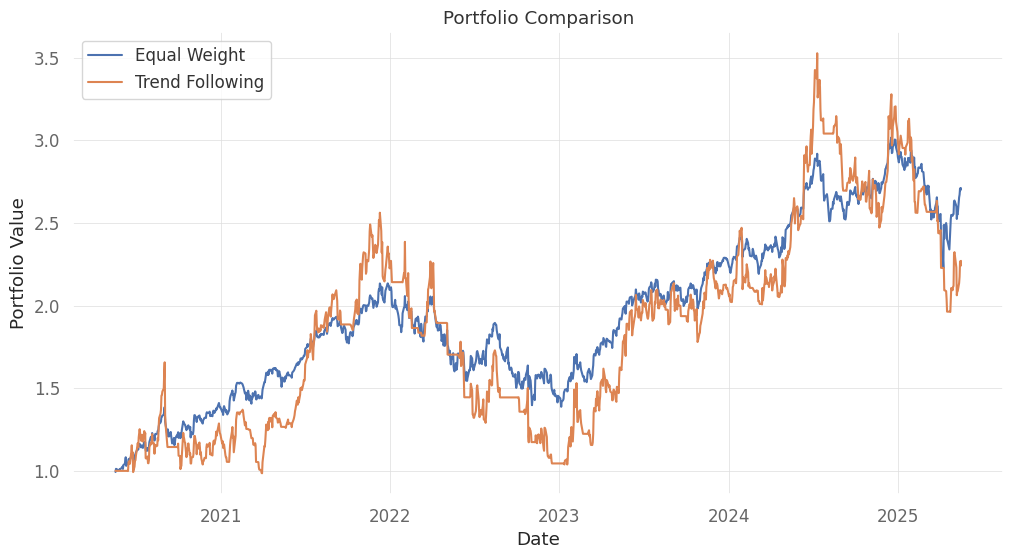

(                 sharpe_ratio  max_drawdown  winning_rate
 Equal Weight         0.057136     -0.349827      0.546975
 Trend Following      0.036888     -0.594618      0.414809,
            Equal Weight Trend Following
            Equal Weight Trend Following
 Date                                   
 2020-05-19    -0.006773        0.000000
 2020-05-20     0.019188        0.000000
 2020-05-21    -0.007430        0.000000
 2020-05-22     0.004109        0.000000
 2020-05-26    -0.004244        0.000000
 ...                 ...             ...
 2025-05-12     0.039813        0.023001
 2025-05-13     0.006031        0.018094
 2025-05-14     0.014146        0.042438
 2025-05-15    -0.004059       -0.012178
 2025-05-16     0.004618        0.013853
 
 [1256 rows x 2 columns],
             Equal Weight  Trend Following
 Date                                     
 2020-05-19      0.993227         1.000000
 2020-05-20      1.012285         1.000000
 2020-05-21      1.004764         1.000000
 2020

In [13]:
analysis.compare_strategies([equal_weight_strategy, trend_following_strategy])